## Data Science Project - Titanic Survival Prediction

This dataset can be found on Kaggle : https://www.kaggle.com/competitions/titanic/data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Titanic.csv")

In [5]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().round(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


#### Data Cleaning & Data Pre-Processing

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

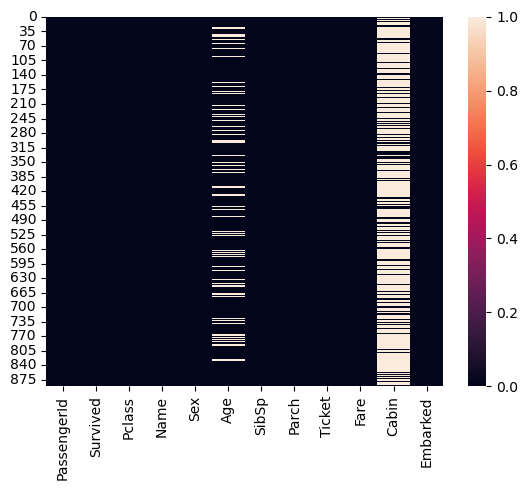

In [16]:
sns.heatmap(df.isna())

In [17]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [18]:
df.drop("Cabin",axis = 1 , inplace = True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [28]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
sex = pd.get_dummies(df["Sex"],drop_first=True)

In [32]:
sex = sex.replace({True: 1, False: 0})
sex

C:\Users\zaham\AppData\Local\Temp\ipykernel_13288\3901601223.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sex = sex.replace({True: 1, False: 0})


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [34]:
Emb = pd.get_dummies(df["Embarked"])

In [36]:
Emb = Emb.replace({True: 1, False: 0})
Emb

C:\Users\zaham\AppData\Local\Temp\ipykernel_13288\2745778098.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Emb = Emb.replace({True: 1, False: 0})


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [38]:
df["Sex"]=sex

In [40]:
df.drop("Sex",axis=1,inplace=True)

In [42]:
df = pd.concat([df,sex,Emb],axis =1)

In [44]:
df.drop(["PassengerId","Embarked"],axis=1,inplace=True)

In [46]:
df.rename(columns={"male":"Sex"},inplace=True)

In [48]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1


#### EDA 

* What is the average Age?

In [52]:
df["Age"].mean()

29.69911764705882

* What is the average Passenger fare?

In [55]:
df["Fare"].mean()

32.204207968574636

* What is the highest amount of Passenger fare in dataset?

In [58]:
df['Fare'].max()

512.3292

* What is the name of highest paid Passenger?

In [61]:
df['Name'][df["Fare"]==df['Fare'].max()]

258                      Ward, Miss. Anna
679    Cardeza, Mr. Thomas Drake Martinez
737                Lesurer, Mr. Gustave J
Name: Name, dtype: object

* What is the name of Low paid Passenger?

In [64]:
df['Name'][df["Fare"]==df['Fare'].min()]

179                 Leonard, Mr. Lionel
263               Harrison, Mr. William
271        Tornquist, Mr. William Henry
277         Parkes, Mr. Francis "Frank"
302     Johnson, Mr. William Cahoone Jr
413      Cunningham, Mr. Alfred Fleming
466               Campbell, Mr. William
481    Frost, Mr. Anthony Wood "Archie"
597                 Johnson, Mr. Alfred
633       Parr, Mr. William Henry Marsh
674          Watson, Mr. Ennis Hastings
732                Knight, Mr. Robert J
806              Andrews, Mr. Thomas Jr
815                    Fry, Mr. Richard
822     Reuchlin, Jonkheer. John George
Name: Name, dtype: object

* What was the average Fare of all Passengers per sex?

In [67]:
df.groupby("Sex")['Fare'].mean()

Sex
0    44.479818
1    25.523893
Name: Fare, dtype: float64

* How many Passenger Survived?

In [70]:
df[df["Survived"]==1]['Sex'].value_counts()

Sex
0    233
1    109
Name: count, dtype: int64

* How many Passenger survived or died per class?

In [73]:
df.groupby('Pclass')["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [75]:
df.drop(["Name","Ticket"],axis=1,inplace=True)

#### Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

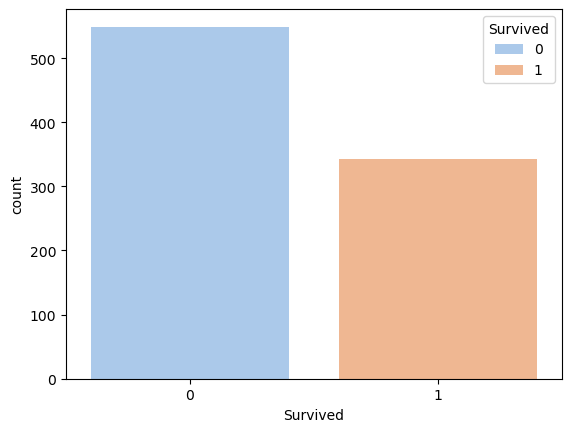

In [78]:
sns.countplot(x="Survived",data=df,hue="Survived",palette="pastel")

<Axes: xlabel='Survived', ylabel='count'>

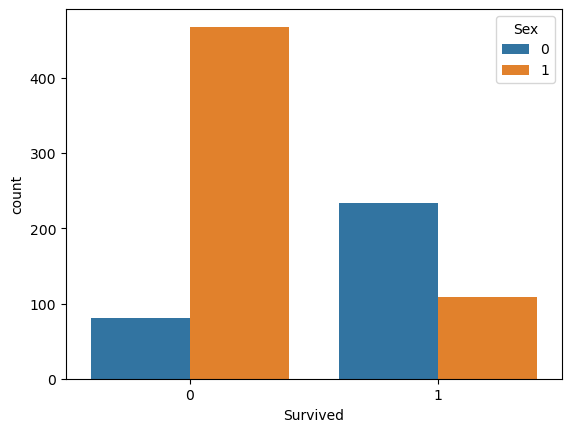

In [79]:
sns.countplot(x="Survived",data=df,hue="Sex")

<Axes: xlabel='Pclass', ylabel='Survived'>

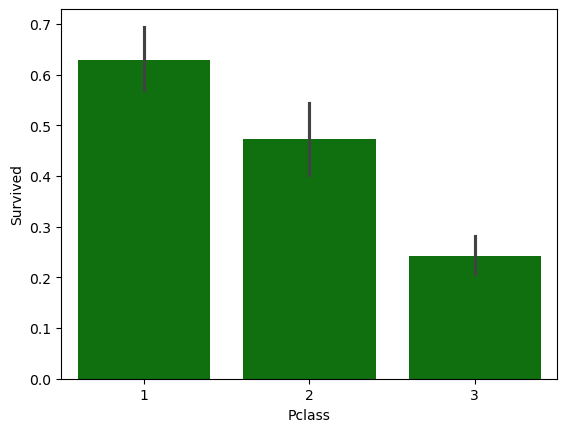

In [81]:
sns.barplot(x= df["Pclass"],y = df["Survived"],color="green")

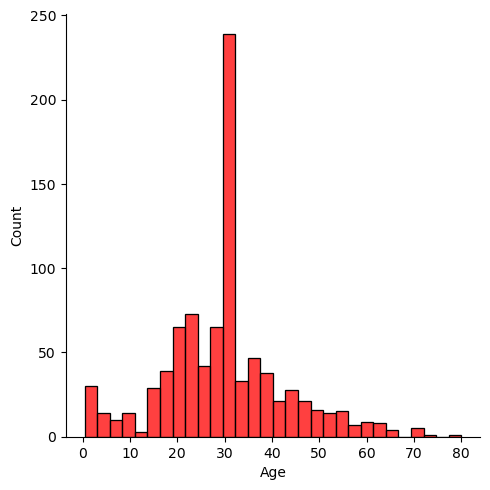

In [83]:
sns.displot(df["Age"],color="red")

<Axes: xlabel='Fare', ylabel='Density'>

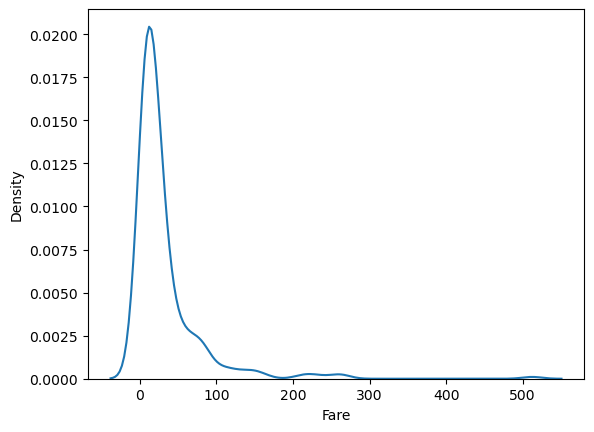

In [84]:
sns.kdeplot(df["Fare"])

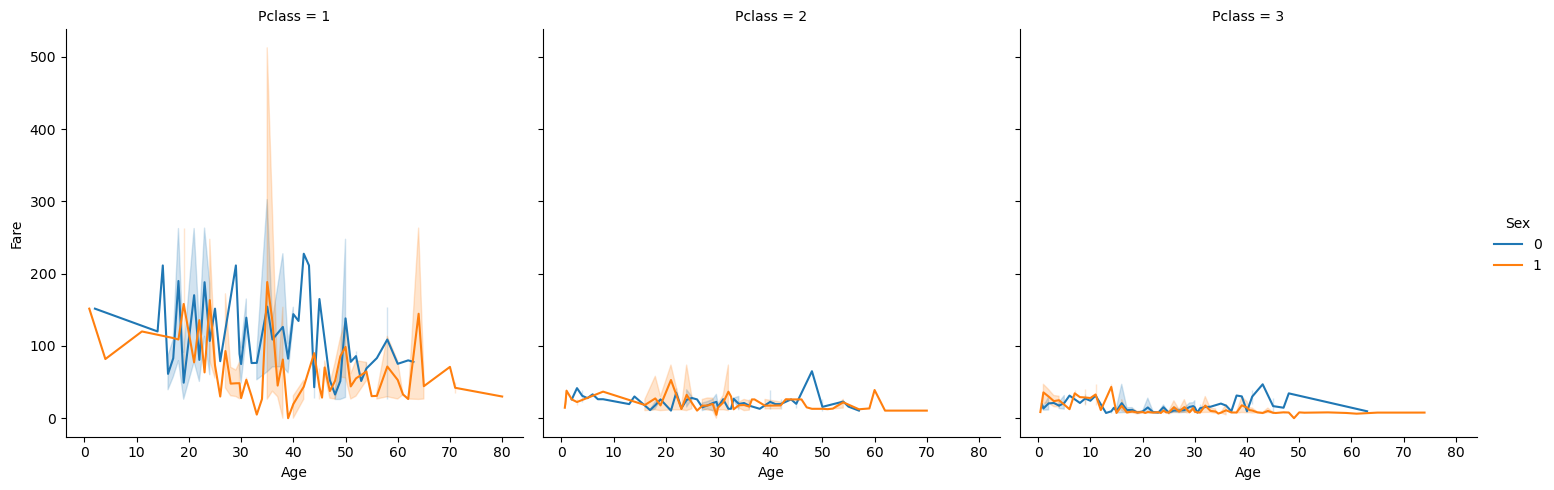

In [86]:
sns.relplot(x="Age",y="Fare",col="Pclass",hue="Sex",kind="line",data=df)

<Axes: xlabel='Age', ylabel='Fare'>

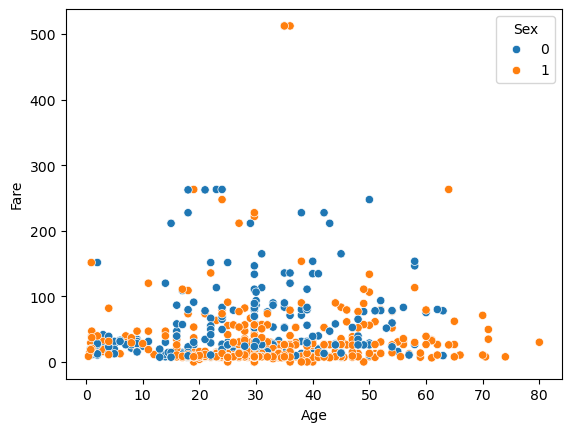

In [87]:
sns.scatterplot(x="Age",y="Fare",hue="Sex",data=df)

<Axes: >

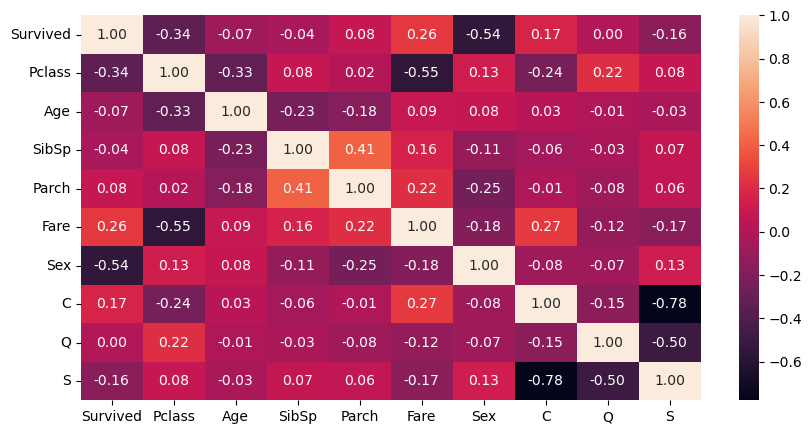

In [89]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True,fmt="0.2f")

## Building Model
* Train and Test Data

In [92]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [93]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [96]:
X_train.shape

(668, 9)

In [97]:
X_test.shape

(223, 9)

In [98]:
y_train.shape

(668,)

In [99]:
y_test.shape

(223,)

## Logistic Regression

* Pre-Processing

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [105]:
from sklearn.metrics import accuracy_score
train_score = model.score(X_train,y_train)*100
accuracy = accuracy_score(y_pred,y_test)*100

In [106]:
print("Training Accuracy  : ",round(train_score,2))
print("Model Accuracy Score : ",round(accuracy),2)

Training Accuracy  :  80.39
Model Accuracy Score :  80 2
